# Storytelling

In [59]:
import pandas as pd
import matplotlib.pyplot as plt 
from constants import GRAY_1, BLUE_1

plt.style.use("styles/base.mplstyle") 
df = pd.read_csv("data/resultat-ansokningsomgang-2020-2024-beslut.csv")
df

,Utbildningsområde,Utbildningsnamn,Län,Kommun,Antal kommuner,Flera kommuner,YH-poäng,Studieform,Studietakt %,Utbildningsanordnare,Huvudmannatyp,Sökta utbildningsomgångar,Beviljade utbildningsomgångar,Sökta platser totalt,Beviljade platser totalt,Sökta platser per utbildningsomgång,Ansökningsomgång,Diarienummer,Beslut
0,Data/IT,.NET Developer,Jämtland,Östersund,5,True,425,Bunden,100,KYH AB,Privat,5,0,35,0,7,2020,MYH 2020/4419,False
1,Data/IT,.NET Developer,Kronoberg,Växjö,5,True,425,Bunden,100,KYH AB,Privat,5,0,40,0,8,2020,MYH 2020/4419,False
2,Data/IT,.NET Developer,Skåne,Malmö,1,False,430,Bunden,100,KYH AB Malmö,Privat,3,0,105,0,35,2020,MYH 2020/4482,False
3,Data/IT,.NET Developer,Stockholm,Norrtälje,5,True,425,Bunden,100,KYH AB,Privat,5,0,45,0,9,2020,MYH 2020/4419,False
4,Data/IT,.NET Developer,Södermanland,Katrineholm,5,True,425,Bunden,100,KYH AB,Privat,5,0,35,0,7,2020,MYH 2020/4419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7635,Transporttjänster,Integrerad Trafikflygarutbildning Statsstöd,Västra Götaland,Göteborg,1,False,500,Bunden,100,Svensk Pilotutbildning AB,Privat,5,0,100,0,20,2024,MYH 2024/3675,False
7636,Transporttjänster,Trafikflygare med inriktning hållbarhet och pi...,Västerbotten,Skellefteå,1,False,500,Bunden,100,Green Flight Academy AB,Privat,5,0,120,0,24,2024,MYH 2024/3415,False
7637,Transporttjänster,UAS-operatör inom Samhällsbyggnad,Flera kommuner,Flera kommuner,5,True,230,Distans,100,Folkuniversitetet - Stiftelsen Kursverksamhete...,Privat,3,0,90,0,30,2024,MYH 2024/3326,False
7638,Övrigt,Hantverkslärling - smala och traditionella han...,Dalarna,Leksand,1,False,500,Distans,100,Stiftelsen Hantverk & Utbildning,Privat,5,5,175,175,35,2024,MYH 2024/3586,True


In [60]:
df.shape

(7640, 19)

In [61]:
df.dtypes

Utbildningsområde                      object
Utbildningsnamn                        object
Län                                    object
Kommun                                 object
Antal kommuner                          int64
Flera kommuner                           bool
YH-poäng                                int64
Studieform                             object
Studietakt %                            int64
Utbildningsanordnare                   object
Huvudmannatyp                          object
Sökta utbildningsomgångar               int64
Beviljade utbildningsomgångar           int64
Sökta platser totalt                    int64
Beviljade platser totalt                int64
Sökta platser per utbildningsomgång     int64
Ansökningsomgång                        int64
Diarienummer                           object
Beslut                                   bool
dtype: object

In [62]:
df.columns

Index(['Utbildningsområde', 'Utbildningsnamn', 'Län', 'Kommun',
       'Antal kommuner', 'Flera kommuner', 'YH-poäng', 'Studieform',
       'Studietakt %', 'Utbildningsanordnare', 'Huvudmannatyp',
       'Sökta utbildningsomgångar', 'Beviljade utbildningsomgångar',
       'Sökta platser totalt', 'Beviljade platser totalt',
       'Sökta platser per utbildningsomgång', 'Ansökningsomgång',
       'Diarienummer', 'Beslut'],
      dtype='object')

In [63]:
df_beslut_true = df[df["Beslut"] == True]["Utbildningsområde"].value_counts()
df_beslut_true

Utbildningsområde
Teknik och tillverkning                         571
Samhällsbyggnad och byggteknik                  405
Ekonomi, administration och försäljning         347
Data/IT                                         339
Hälso- och sjukvård samt socialt arbete         319
Kultur, media och design                        115
Hotell, restaurang och turism                    86
Lantbruk, djurvård, trädgård, skog och fiske     82
Transporttjänster                                65
Pedagogik och undervisning                       35
Säkerhetstjänster                                18
Journalistik och information                     17
Friskvård och kroppsvård                         11
Juridik                                           9
Övrigt                                            6
Name: count, dtype: int64

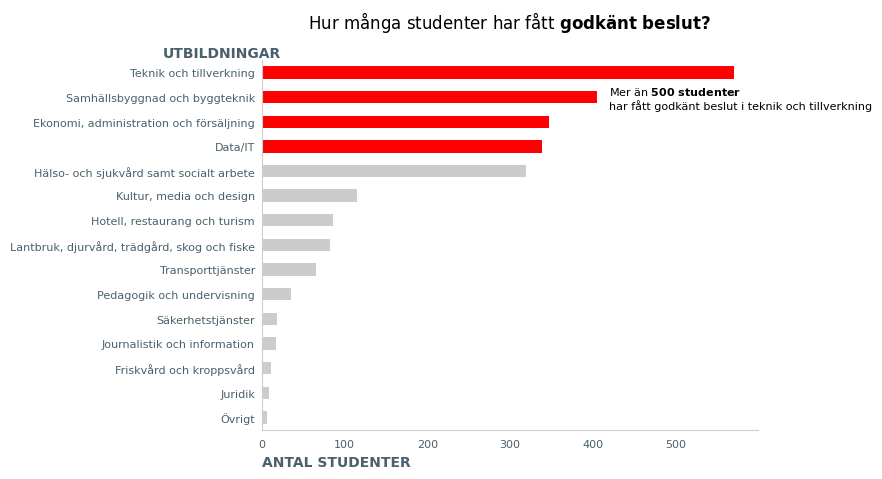

In [ ]:
from constants import GRAY_3

colors = [GRAY_1] * len(df_beslut_true)
colors[:4] = ["red"] * 4

ax = df_beslut_true.plot(kind='barh', color=colors)
ax.invert_yaxis()
ax.spines[["top", "right"]].set_visible(False)
ax.spines[['left', 'bottom']].set_color(GRAY_1)

ax.tick_params(axis='both', colors=GRAY_3, labelsize=8, length=0, pad=7)
ax.tick_params(axis="y", pad=5)
ax.set_title("Hur många studenter har fått " + r"$\bf{godkänt \ beslut?}$", pad=23)
ax.set_xlabel("ANTAL STUDENTER", color=GRAY_3, loc='left', fontweight="bold")
ax.set_ylabel("UTBILDNINGAR", color=GRAY_3, rotation=0, fontweight='bold')
ax.annotate(text="Mer än " + r"$\bf{500 \ studenter}$" + "\nhar fått godkänt beslut i teknik och tillverkning", xy=(9, 5.5), xytext=(420, 1.50), fontsize=8)
ax.yaxis.set_label_coords(-0.08, 1)

fig = ax.get_figure()
fig.savefig("figures/godkant_beslut.png", bbox_inches='tight')
